In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

### 单样本t-test

In [2]:
np.random.seed(2016)
population_salary1 = stats.poisson.rvs(loc=1000,mu=4500, size=150000)
population_salary2 = stats.poisson.rvs(loc=1000, mu=3000, size=100000)
population_salary = np.concatenate((population_salary1, population_salary2))
cd_salay1 = stats.poisson.rvs(loc=1000, mu=3000, size=30)
cd_salary2 = stats.poisson.rvs(loc=1000, mu=3500, size=20)
cd_salay = np.concatenate((cd_salay1, cd_salary2))
print( population_salary.mean() )
print( cd_salay.mean() )

4900.062208
4198.5


In [3]:
stats.ttest_1samp(a=cd_salay,popmean=population_salary.mean())

Ttest_1sampResult(statistic=-18.332508356481146, pvalue=1.401937971050218e-23)

In [4]:
stats.t.ppf(q=0.025,df=49) #30+20-1

-2.0095752344892093

In [5]:
stats.t.ppf(q=0.975,df=49) #30+20-1

2.0095752344892088

In [6]:
stats.t.cdf(x=-19.318,df=49)*2

1.4631425045063935e-24

In [7]:
sigma=cd_salay.std()/math.sqrt(50)
stats.t.interval(0.95,df=49,loc=cd_salay.mean(),scale=sigma)

(4122.3689880749052, 4274.6310119250948)

### 双样本t-test

In [8]:
np.random.seed(12)
cq_salary1 = stats.poisson.rvs(loc=1000, mu=3300, size=30)
cq_salary2 = stats.poisson.rvs(loc=1000, mu=2300, size=20)
cq_salary = np.concatenate((cq_salary1,cq_salary2))
print( cq_salary.mean() )

3903.28


In [9]:
stats.ttest_ind(a=cd_salay,b=cq_salary,
                equal_var=False)  #是否有相同的variance

Ttest_indResult(statistic=3.7361202863220404, pvalue=0.00035821008137746794)

### paired t-test

In [10]:
np.random.seed(11)
before= stats.norm.rvs(loc=60, size=100)
after = before + stats.norm.rvs(loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before, "weight_after":after, "weight_change":after-before})
weight_df.describe()

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,58.765443,60.011518,-1.246075
std,1.323395,0.937751,0.956739
min,55.449379,57.346681,-3.299057
25%,57.994932,59.347368,-1.809242
50%,58.645411,60.027694,-1.282693
75%,59.651154,60.687905,-0.652265
max,62.131848,62.156674,0.951856


In [11]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=13.024187010567308, pvalue=3.4770817651264093e-23)

### type 1/type 2错误

假设检验是反证法的思想，依据样本统计量作出的统计推断，其推断结论并非绝对正确，结论有时也可能有错误，错误分为两类。
 
　　第一类错误（typeⅠerror），Ⅰ型错误，拒绝了实际上成立的H0，，即错误地判为有差别，这种弃真的错误称为Ⅰ型错误。其概率大小用即检验水准用α表示。α可取单尾也可取双尾。假设检验时可根据研究目的来确定其大小，一般取0．05，当拒绝H0时则理论上理论100次检验中平均有5次发生这样的错误．。
 
　　第二类错误（typeⅡ error）。Ⅱ型错误，接受了实际上不成立的H0 ，也就是错误地判为无差别，这类取伪的错误称为第二类错误。第二类错误的概率用β表示，β的大小很难确切估计。当样本例数固定时，α愈小，β愈大；反之，α愈大，β愈小。因而可通过选定α控制β大小。要同时减小α和β，唯有增加样本例数。统计上将1－β称为检验效能或把握度（power of a test），即两个总体确有差别存在，而以α为检验水准，假设检验能发现它们有差别的能力。实际工作中应权衡两类错误中哪一个重要以选择检验水准的大小。


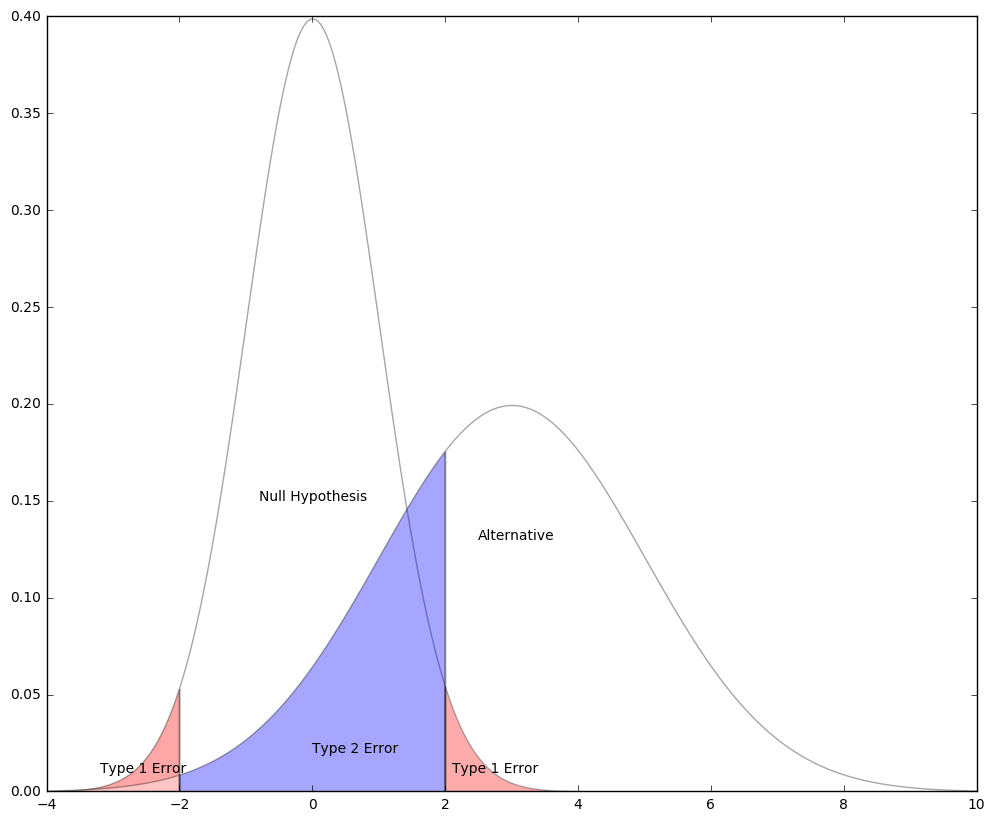

In [12]:
plt.figure(figsize=(12,10))
plt.fill_between(x=np.arange(-4,-2,0.01), y1= stats.norm.pdf(np.arange(-4,-2,0.01)) , facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01), y1= stats.norm.pdf(np.arange(-2,2,0.01)) , facecolor='white', alpha=0.35)
plt.fill_between(x=np.arange(2,4,0.01), y1= stats.norm.pdf(np.arange(2,4,0.01)) , facecolor='red', alpha=0.5)
plt.fill_between(x=np.arange(-4,-2,0.01), y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) , facecolor='white', alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01), y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) , facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01), y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2), facecolor='white', alpha=0.35)
plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In [13]:
# Lower cutoff value
lower_quantile = stats.norm.ppf(0.025)
# Upper cutoff value
upper_quantile = stats.norm.ppf(0.975)

# Area under alternative
low = stats.norm.cdf(lower_quantile, loc=3, scale=2) 
high = stats.norm.cdf(upper_quantile, loc=3, scale=2) # Type II error
high-low

0.29495606111232298